# EG Investment Strategy and Portfolio Comparison  
## Data, Learning, and Algorithms – Chicago Booth PhD Program  
### Trent Potter – '25 MBA  

## Overview  
In this notebook, we implement the **Exponentiated Gradient (EG) investment strategy** and compare it against two benchmark strategies:  

1. **Buy-and-Hold** – Invests an initial allocation and does not rebalance.  
2. **Constant Rebalancing** – Rebalances to a fixed portfolio allocation each period.  

We apply these strategies to simplified S&P 500 returns (2013-2018), ignoring index inclusions/exclusions. Performance is evaluated using the Sharpe ratio across different values of the learning rate $\eta$.  

## Implementation Steps  

### 1. Load and preprocess data  
- Use S&P 500 adjusted daily returns from 2013-2018.  
- Normalize returns to compute price relatives.  

### 2. Implement investment strategies  
- EG strategy: Adjusts allocations dynamically using exponentiated updates.  
- Buy-and-hold: Allocates initial wealth and holds fixed proportions.  
- Constant rebalancing: Rebalances wealth to a fixed allocation each period.  

### 3. Performance evaluation  
- Compute portfolio returns over time.  
- Calculate the Sharpe ratio to compare risk-adjusted returns.  
- Analyze Sharpe ratio vs. $\eta$ to find the best parameter choice.  

## Results  
- We expect the EG strategy to adapt to weight strong performers more heavily, potentially outperforming static strategies.  
- The Sharpe ratio should vary with $\eta$, revealing an optimal trade-off between adaptation and stability.  

## Next Steps  
- Extend analysis to out-of-sample periods beyond 2018.  
- Experiment with alternative market indices or sector ETFs.
- Introduce side information for conditioning (2-period returns / volatility / interest rates / etc)


In [181]:
# Setup Environment

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set print options for numpy
np.set_printoptions(precision=4, floatmode='fixed')

# Set display options for pandas
pd.set_option('display.precision', 4)

# Define Investment Strategy Functions
Define eg_investment_strategy to compute EG portfolio weights and returns to compute strategy returns.

In [182]:
# Define Investment Strategy Functions

def eg_investment_strategy(X, eta):
    """
    Implements the EG (Exponentiated Gradient) investment strategy.
    
    Parameters:
    - X: (n, m) matrix of price relatives, where each row is a time step
    - eta: Learning rate
    
    Returns:
    - P: (n, m) matrix of portfolio weights
    """
    n, m = X.shape
    P = np.zeros((n, m))
    P[0] = np.ones(m) / m  # Start with equal weights

    for t in range(1, n):
        # Compute portfolio return
        portfolio_return = np.dot(P[t-1], X[t-1])

        # Exponentiated Gradient Update
        P_tilde = P[t-1] * np.exp(eta * (X[t-1] / portfolio_return))

        # Normalize to ensure sum(P_t) = 1
        P[t] = P_tilde / np.sum(P_tilde)

    return P

def returns(P, X):
    """
    Compute the returns of the EG investment strategy.
    
    Parameters:
    - P: (n, m) matrix of portfolio weights
    - X: (n, m) matrix of price relatives
    
    Returns:
    - R: (n,) vector of returns
    """
    return (P * X).sum(axis=1)

# Run Example Simulations
Create a small sample array of market price relatives; run the EG strategy and constant weight strategy; and print the resulting portfolio allocations and wealth evolution.

In [183]:
# Run Example Simulations

# Example market price relatives for 5 assets over 3 periods
X = np.array([
    [1.02, 0.98, 1.03, 1.00, 0.99],
    [1.02, 1.01, 1.02, 0.97, 1.04],
    [1.03, 0.95, 1.00, 1.01, 1.02],
])

eta = 0.5  # Learning rate

# Run EG investment strategy
P_eg = eg_investment_strategy(X, eta)

# Run constant weight strategy
P_const = np.ones_like(X) / X.shape[1]  # Constant weights

# Print portfolio allocations and wealth evolution
print("EG Strategy Portfolio Allocations:\n", P_eg)
print("EG Strategy Wealth Evolution:\n", returns(P_eg, X).cumprod())

print("Constant Weight Strategy Portfolio Allocations:\n", P_const)
print("Constant Weight Strategy Wealth Evolution:\n", returns(P_const, X).cumprod())

EG Strategy Portfolio Allocations:
 [[0.2000 0.2000 0.2000 0.2000 0.2000]
 [0.2016 0.1976 0.2026 0.1996 0.1986]
 [0.2024 0.1974 0.2034 0.1955 0.2014]]
EG Strategy Wealth Evolution:
 [1.0040 1.0161 1.0183]
Constant Weight Strategy Portfolio Allocations:
 [[0.2000 0.2000 0.2000 0.2000 0.2000]
 [0.2000 0.2000 0.2000 0.2000 0.2000]
 [0.2000 0.2000 0.2000 0.2000 0.2000]]
Constant Weight Strategy Wealth Evolution:
 [1.0040 1.0160 1.0181]


# Process and Clean Data
Read CSV data (e.g., 'all_stocks_5yr.csv'), convert dates, set multi-index, compute price relatives, unstack the data, and drop columns with NaN values.

In [184]:
# Process and Clean Data

# Read CSV data
df_stocks = pd.read_csv('all_stocks_5yr.csv')

# Convert dates to datetime format
df_stocks['date'] = pd.to_datetime(df_stocks['date'])

# Set multi-index with date and stock name
df_stocks.set_index(['date', 'Name'], inplace=True)

# Compute price relatives (close price / open price)
df_stocks = df_stocks['close'] / df_stocks['open']

# Unstack the data to have stock names as columns
df_stocks = df_stocks.unstack(level='Name')

# Drop columns with NaN values
nan_columns = df_stocks.columns[df_stocks.isna().any(axis=0)]
df_stocks.drop(columns=nan_columns, inplace=True)

# Display the cleaned data
df_stocks.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,1.0002,0.9788,1.0071,1.0021,0.9967,1.0080,1.0006,1.0041,1.0211,1.0219,...,1.0075,1.0138,1.0012,1.0049,0.9925,1.0030,1.0251,1.0111,1.0046,1.0229
2013-02-11,0.9874,0.9711,0.9967,1.0072,0.9923,0.9981,0.9954,0.9997,0.9910,1.0020,...,1.0021,1.0000,0.9992,0.9993,1.0013,1.0129,0.9906,0.9987,1.0029,1.0060
2013-02-12,0.9958,0.9875,1.0027,0.9758,0.9902,1.0056,1.0009,1.0066,1.0088,1.0026,...,1.0050,1.0062,1.0024,1.0012,0.9938,1.0156,1.0026,0.9972,1.0086,1.0102
2013-02-13,0.9987,1.0252,1.0009,0.9996,0.9958,0.9979,1.0050,1.0033,0.9977,0.9994,...,1.0014,1.0045,1.0024,1.0044,1.0013,1.0093,0.9944,1.0034,1.0065,0.9926
2013-02-14,0.9969,0.9364,1.0023,1.0045,1.0434,1.0021,1.0123,0.9989,0.9977,1.0113,...,0.9940,1.0221,1.0020,1.0005,1.0088,1.0089,0.9941,1.0063,0.9980,0.9964


# Plot Strategy Performance
For different values of eta, compute EG returns, calculate log wealth differences from constant strategy, and plot the results using matplotlib.

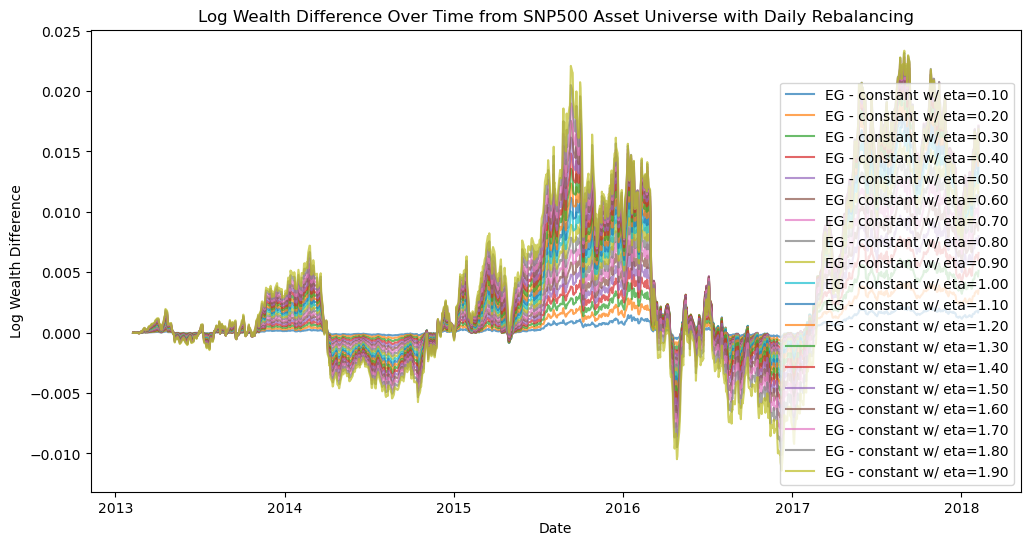

In [185]:
# Plot Strategy Performance

# Extract price relatives matrix from DataFrame
X = df_stocks.values

# Compute constant weight strategy returns and log wealth
P_const = np.ones_like(X) / X.shape[1]
const_returns = returns(P_const, X)
const_wealth = const_returns.cumprod()
log_const_wealth = np.log(const_wealth)

# Define range of eta values
etas = np.arange(0.1, 2, 0.1)

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot log wealth difference for different eta values
for eta in etas:
    P_eg = eg_investment_strategy(X, eta)
    eg_return = returns(P_eg, X)
    log_eg_wealth = np.log(eg_return.cumprod())
    plt.plot(df_stocks.index, log_eg_wealth - log_const_wealth, label=f'EG - constant w/ eta={eta:.2f}', alpha=0.7)

# Add plot labels and title
plt.xlabel('Date')
plt.ylabel('Log Wealth Difference')
plt.title('Log Wealth Difference Over Time from SNP500 Asset Universe with Daily Rebalancing')
plt.legend()
plt.show()

# Compute Sharpe Ratios
Define the annualized_sharpe function and compute Sharpe ratios for the buy-and-hold and other strategies based on returns.

In [186]:
# Compute Sharpe Ratios

def annualized_sharpe(returns):
    """
    Compute the Sharpe ratio of a strategy.
    
    Parameters:
    - returns: (n,) vector of returns
    
    Returns:
    - float: Annualized Sharpe ratio
    """
    return np.sqrt(252) * np.mean(returns) / np.std(returns)

# Buy and hold strategy
padded_X = np.vstack([
    np.ones(X.shape[1]),
    X
])

P_bh = (padded_X.cumprod(axis=0) / padded_X.cumprod(axis=0).sum(axis=1, keepdims=True))[:-1]
bh_return = returns(P_bh, X)
bh_wealth = bh_return.cumprod()
log_bh_wealth = np.log(bh_wealth)

# Create a DataFrame to store the results
results = pd.DataFrame([{
    'Strategy': 'Constant Weight',
    'Eta': 'N/A',
    'Sharpe': annualized_sharpe(const_returns - 1),
    'Mean Return': np.mean(const_returns - 1) * 252,
    'Std Return': np.std(const_returns - 1) * np.sqrt(252)
},
{
    'Strategy': 'Buy and Hold',
    'Eta': 'N/A',
    'Sharpe': annualized_sharpe(bh_return - 1),
    'Mean Return': np.mean(bh_return - 1) * 252,
    'Std Return': np.std(bh_return - 1) * np.sqrt(252)
}])

# Add EG strategy results for different eta values
eg_returns = []
for eta in etas:
    P_eg = eg_investment_strategy(X, eta)
    eg_return = returns(P_eg, X)
    eg_returns.append(eg_return)
    mean_return = np.mean(eg_return - 1) * 252
    std_return = np.std(eg_return - 1) * np.sqrt(252)
    results = pd.concat([results, pd.DataFrame([{
        'Strategy': 'EG',
        'Eta': eta,
        'Sharpe': annualized_sharpe(eg_return - 1),
        'Mean Return': mean_return,
        'Std Return': std_return
    }])], ignore_index=True)

# Display the results
results

,Strategy,Eta,Sharpe,Mean Return,Std Return
0,Constant Weight,N/A,0.8864,0.0892,0.1006
1,Buy and Hold,N/A,0.9341,0.0924,0.0989
2,EG,0.1,0.8919,0.0895,0.1004
3,EG,0.2,0.8969,0.0898,0.1002
4,EG,0.3,0.9015,0.0901,0.1000
5,EG,0.4,0.9058,0.0904,0.0998
6,EG,0.5,0.9097,0.0907,0.0997
7,EG,0.6,0.9133,0.0909,0.0996
8,EG,0.7,0.9165,0.0912,0.0995
9,EG,0.8,0.9195,0.0914,0.0994


# Aggregate and Display Results
Build a DataFrame summarizing each strategy’s performance metrics, including Sharpe ratio, mean return, and standard deviation of returns, then display the table.

In [187]:
# Aggregate and Display Results

# Create a DataFrame to store the results
results = pd.DataFrame([{
    'Strategy': 'Constant Weight',
    'Eta': 'N/A',
    'Sharpe': annualized_sharpe(const_returns - 1),
    'Mean Return': np.mean(const_returns - 1) * 252,
    'Std Return': np.std(const_returns - 1) * np.sqrt(252)
},
{
    'Strategy': 'Buy and Hold',
    'Eta': 'N/A',
    'Sharpe': annualized_sharpe(bh_return - 1),
    'Mean Return': np.mean(bh_return - 1) * 252,
    'Std Return': np.std(bh_return - 1) * np.sqrt(252)
}])

# Add EG strategy results for different eta values
eg_returns = []
for eta in etas:
    P_eg = eg_investment_strategy(X, eta)
    eg_return = returns(P_eg, X)
    eg_returns.append(eg_return)
    mean_return = np.mean(eg_return - 1) * 252
    std_return = np.std(eg_return - 1) * np.sqrt(252)
    results = pd.concat([results, pd.DataFrame([{
        'Strategy': 'EG',
        'Eta': eta,
        'Sharpe': annualized_sharpe(eg_return - 1),
        'Mean Return': mean_return,
        'Std Return': std_return
    }])], ignore_index=True)

# Display the results
results

,Strategy,Eta,Sharpe,Mean Return,Std Return
0,Constant Weight,N/A,0.8864,0.0892,0.1006
1,Buy and Hold,N/A,0.9341,0.0924,0.0989
2,EG,0.1,0.8919,0.0895,0.1004
3,EG,0.2,0.8969,0.0898,0.1002
4,EG,0.3,0.9015,0.0901,0.1000
5,EG,0.4,0.9058,0.0904,0.0998
6,EG,0.5,0.9097,0.0907,0.0997
7,EG,0.6,0.9133,0.0909,0.0996
8,EG,0.7,0.9165,0.0912,0.0995
9,EG,0.8,0.9195,0.0914,0.0994
